# TASK 4

##Spam Detection With Machine Learning

The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.

In [ ]:
import pandas as pd
import numpy as np
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**Importing Data**

In [ ]:
df = pd.read_csv("spam.csv", encoding='latin-1')

In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df= df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

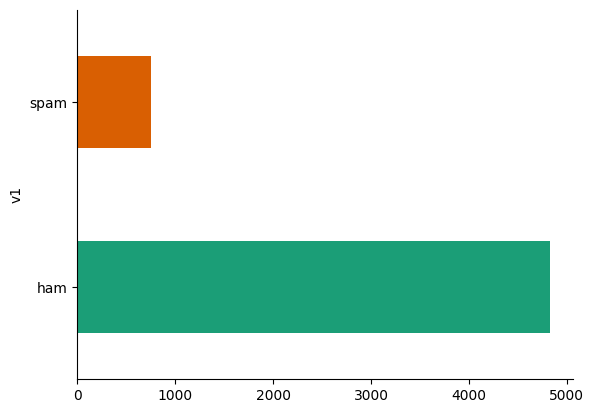

In [ ]:

import seaborn as sns
df.groupby('v1').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
#replacing spam and ham with 0 and 1
df = df.replace(['ham','spam'],[0,1])
df.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


**Counting the number of words in the text**

In [ ]:
df['Count']=0
for i in np.arange(0,len(df.v2)):
    df.loc[i,'Count'] = len(df.loc[i,'v2'])

df.head()

,v1,v2,Count
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
# Total ham(0) and spam(1) messages
df['v1'].value_counts()

v1
0    4825
1     747
Name: count, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   int64 
 1   v2      5572 non-null   object
 2   Count   5572 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 130.7+ KB


In [ ]:
corpus = []
ps = PorterStemmer()

In [ ]:
# Original Messages

print (df['v2'][0])
print (df['v2'][1])

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
Ok lar... Joking wif u oni...


# Processing Messages

In [ ]:
for i in range(0,5572):
  # Applying regular exp

  #replace email address with 'emailad'
   msg = df['v2'][i]
   msg = re.sub('\b[\w\-.]+?@\w+?\.\w{2,4}\b', 'emailaddr', df['v2'][i])

#replace urls with 'httpadd'
   msg = re.sub('(http[s]?\S+)|(\w+\.[A-Za-z]{2,4}\S*)', 'httpaddr', df['v2'][i])

#Replace money symbols with 'moneysymb'
   msg = re.sub('£|\$', 'moneysymb', df['v2'][i])

#Replace phone numbers with 'phonenumbr'
   msg = re.sub('\b(\+\d{1,2}\s)?\d?[\-(.]?\d{3}\)?[\s.-]?\d{3}[\s.-]?\d{4}\b', 'phonenumbr', df['v2'][i])

#Replace numbers with 'numbr'
   msg = re.sub('\d+(\.\d+)?', 'numbr', df['v2'][i])
   ''' Remove all punctuations '''
   msg = re.sub('[^\w\d\s]', ' ', df['v2'][i])

   if i<2:
        print("\t\t\t\t MESSAGE ", i)

   if i<2:
        print("\n After Regular Expression - Message ", i, " : ", msg)

    # Each word to lower case
   msg = msg.lower()

   if i<2:
        print("\n Lower case Message ", i, " : ", msg)

    # Splitting words to Tokenize
   msg = msg.split()
   if i<2:
        print("\n After Splitting - Message ", i, " : ", msg)

    # Stemming with PorterStemmer handling Stop Words
   msg = [ps.stem(word) for word in msg if not word in set(stopwords.words('english'))]
   if i<2:
        print("\n After Stemming - Message ", i, " : ", msg)

    # preparing Messages with Remaining Tokens
   msg = ' '.join(msg)
   if i<2:
        print("\n Final Prepared - Message ", i, " : ", msg, "\n\n")

  # Preparing WordVector Corpus
   corpus.append(msg)


				 MESSAGE  0

 After Regular Expression - Message  0  :  Go until jurong point  crazy   Available only in bugis n great world la e buffet    Cine there got amore wat   

 Lower case Message  0  :  go until jurong point  crazy   available only in bugis n great world la e buffet    cine there got amore wat   

 After Splitting - Message  0  :  ['go', 'until', 'jurong', 'point', 'crazy', 'available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'there', 'got', 'amore', 'wat']

 After Stemming - Message  0  :  ['go', 'jurong', 'point', 'crazi', 'avail', 'bugi', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amor', 'wat']

 Final Prepared - Message  0  :  go jurong point crazi avail bugi n great world la e buffet cine got amor wat 


				 MESSAGE  1

 After Regular Expression - Message  1  :  Ok lar    Joking wif u oni   

 Lower case Message  1  :  ok lar    joking wif u oni   

 After Splitting - Message  1  :  ['ok', 'lar', 'joking', 'wif', '

In [ ]:

cv = CountVectorizer()
x = cv.fit_transform(corpus).toarray()

## Applying Classification

- Input: Prepared Sparse Matrix
- Output: Count of Labels(Spam or Ham)

In [ ]:
y = df['v1']
print (y.value_counts())

print(y[0])
print(y[1])

v1
0    4825
1     747
Name: count, dtype: int64
0
0


**Encoding Labels**

In [ ]:
le = LabelEncoder()
y = le.fit_transform(y)

print(y[0])
print(y[1])

0
0


#Splitting to Training and Testing Data

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y,test_size= 0.20, random_state = 42)

# Applying Gaussian Naive Bayes

In [ ]:
bayes_classifier = GaussianNB()
bayes_classifier.fit(xtrain, ytrain)

GaussianNB()

In [ ]:
# Predicting
y_pred = bayes_classifier.predict(xtest)

# Results

In [ ]:
# Evaluating
cm = confusion_matrix(ytest, y_pred)
cm

array([[837, 128],
       [ 10, 140]])

In [ ]:
print ("Accuracy : %0.5f \n\n" % accuracy_score(ytest, bayes_classifier.predict(xtest)))
print (classification_report(ytest, bayes_classifier.predict(xtest)))

Accuracy : 0.87623 


              precision    recall  f1-score   support

           0       0.99      0.87      0.92       965
           1       0.52      0.93      0.67       150

    accuracy                           0.88      1115
   macro avg       0.76      0.90      0.80      1115
weighted avg       0.93      0.88      0.89      1115



# Applying Decision Tree

In [ ]:
dt = DecisionTreeClassifier(random_state=50)
dt.fit(xtrain, ytrain)

DecisionTreeClassifier(random_state=50)

In [ ]:
# Predicting
y_pred_dt = dt.predict(xtest)

# Results

In [ ]:
# Evaluating
cm = confusion_matrix(ytest, y_pred_dt)

print(cm)

[[958   7]
 [ 21 129]]


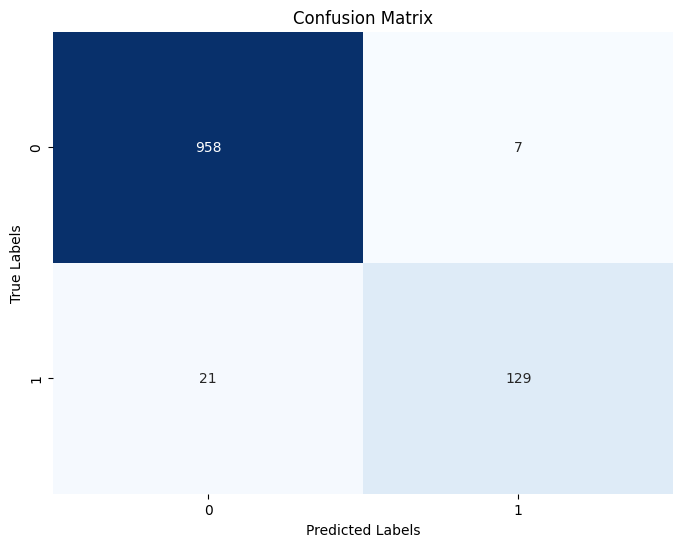

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
print ("Accuracy : %0.5f \n\n" % accuracy_score(ytest, dt.predict(xtest)))
print (classification_report(ytest, dt.predict(xtest)))

Accuracy : 0.97489 


              precision    recall  f1-score   support

           0       0.98      0.99      0.99       965
           1       0.95      0.86      0.90       150

    accuracy                           0.97      1115
   macro avg       0.96      0.93      0.94      1115
weighted avg       0.97      0.97      0.97      1115



# Final Accuracy

**Decision Tree** : 97.489

**Gaussian NB** :  87.623